In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = np.load('mnist.npz')

print("Training data (X):", data['train_x'].shape, data['train_x'].dtype)
print("Training data (Y):", data['train_y'].shape, data['train_y'].dtype)
print("Test data (X):", data['test_x'].shape, data['test_x'].dtype)
print("Test data (Y):", data['test_y'].shape, data['test_y'].dtype)

Training data (X): (60000, 28, 28) float32
Training data (Y): (60000,) uint8
Test data (X): (10000, 28, 28) float32
Test data (Y): (10000,) uint8


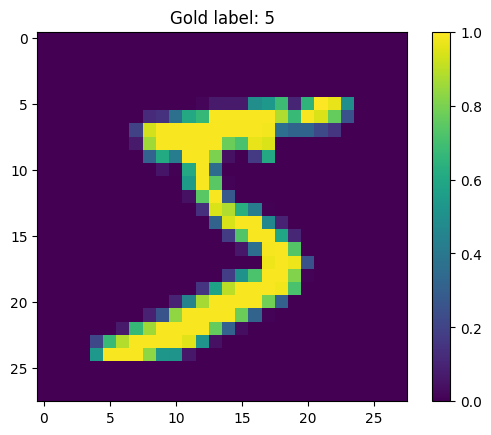

In [8]:
i = 0
x = data['train_x'][i]
y = data['train_y'][i]

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.set_title('Gold label: {}'.format(y))
im = ax.imshow(x)
fig.colorbar(im)
plt.show()

In [9]:
x[7][8]

0.93333334

In [10]:
def images_to_vectors(X):
  X = np.reshape(X, (len(X), -1))         # Flatten: (N x 28 x 28) -> (N x 784)
  return np.c_[X, np.ones(len(X))]        # Append 1: (N x 784) -> (N x 785)


In [12]:
X_train = images_to_vectors(data['train_x'])
X_test = images_to_vectors(data['test_x'])

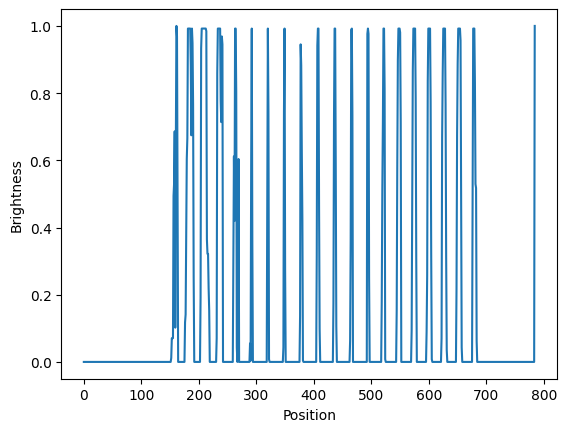

In [13]:
x = X_train[i]

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(x)), x)
ax.set_xlabel('Position')
ax.set_ylabel('Brightness')
plt.show()

In [14]:
x[204]

0.9333333373069763

In [16]:
def softmax(a):
  ea = np.exp(a)
  return ea / ea.sum()


In [17]:
a = np.array([0.1, -0.2, 0.3, -0.4, 0.5])
softmax(a)

array([0.19760595, 0.14639009, 0.24135645, 0.11985407, 0.29479344])

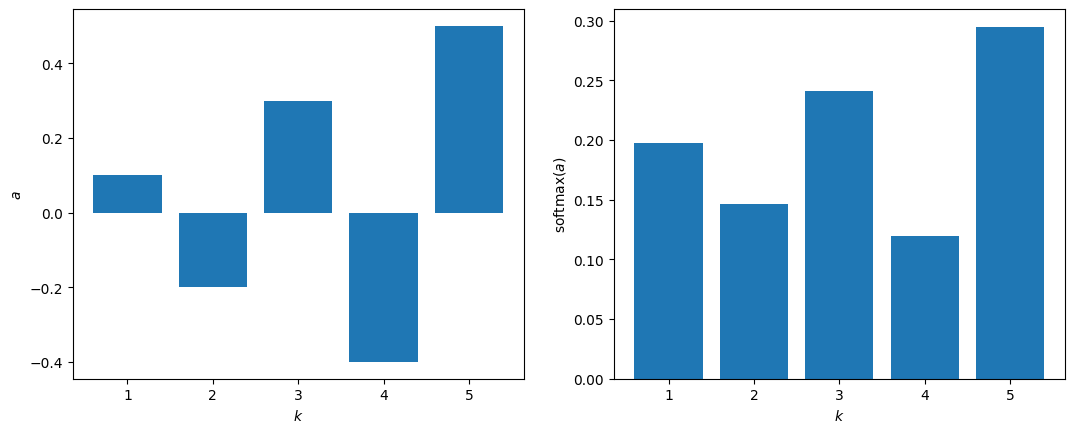

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))
ax1.bar(range(1, 6), a)
ax1.set_xlabel('$k$')
ax1.set_ylabel('$a$')
ax2.bar(range(1, 6), softmax(a))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'${\rm softmax}(a)$')
fig.show()

In [19]:
a = np.array([1000, 0])
softmax(a)

/tmp/ipykernel_15916/514031399.py:2: RuntimeWarning: overflow encountered in exp
  ea = np.exp(a)
/tmp/ipykernel_15916/514031399.py:3: RuntimeWarning: invalid value encountered in divide
  return ea / ea.sum()


array([nan,  0.])

In [20]:
def softmax(a):
  ea = np.exp(a - np.max(a))
  return ea / ea.sum()


In [21]:
a = np.array([1000, 0])
softmax(a)

array([1., 0.])

In [22]:
import numpy as np
from sklearn.linear_model import SGDClassifier


def image_to_vector(X):
  return np.reshape(X, (len(X), -1))  # Flatten: (N x 28 x 28) -> (N x 784)


data = np.load('mnist.npz')
Xtrain = image_to_vector(data['train_x'])       # (60000 x 784) (no bias term)
Ytrain = data['train_y']                        # (60000) (not one-hot encoding)
Xtest = image_to_vector(data['test_x'])         # (10000 x 784) (no bias term)
Ytest = data['test_y']                          # (10000) (not one-hot encoding)

model = SGDClassifier(loss='log')
model.fit(Xtrain, Ytrain)


/home/buntin/jupyterlab/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [23]:
model.predict(Xtest[0:1])

array([7], dtype=uint8)

In [24]:
Ytest[0]

7

In [25]:
model.predict_proba(Xtest[0:1])

array([[4.97221957e-05, 2.04213462e-10, 9.30250825e-04, 1.91787783e-02,
        2.81048158e-06, 1.94111769e-04, 2.92669305e-08, 9.79068900e-01,
        6.65236616e-05, 5.08873131e-04]])

In [26]:
model.score(Xtest, Ytest)

0.9171

In [27]:
from sklearn.metrics import confusion_matrix
Ytest_pred = model.predict(Xtest)
confusion_matrix(Ytest, Ytest_pred)

array([[ 954,    0,    1,    2,    1,    5,    9,    4,    2,    2],
       [   0, 1106,    3,    1,    1,    1,    5,    1,   17,    0],
       [   5,    9,  918,   18,    9,    3,   12,   11,   42,    5],
       [   4,    1,   22,  911,    2,   22,    4,   11,   23,   10],
       [   1,    1,    6,    1,  904,    0,   10,    1,   17,   41],
       [   9,    3,    2,   46,   10,  744,   24,    7,   38,    9],
       [   6,    3,    7,    2,    6,   10,  922,    0,    2,    0],
       [   2,   10,   23,    6,    8,    1,    0,  944,    5,   29],
       [   7,    9,    7,   13,   10,   28,   10,   12,  871,    7],
       [   6,    7,    3,   12,   26,   11,    0,   30,   17,  897]])

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
Ytest_pred = model.predict(Xtest)

In [29]:
precision_score(Ytest, Ytest_pred, average=None)

array([0.95975855, 0.96257615, 0.92540323, 0.90019763, 0.92528147,
       0.90181818, 0.92570281, 0.92458374, 0.84235977, 0.897     ])

In [30]:
recall_score(Ytest, Ytest_pred, average=None)

array([0.97346939, 0.97444934, 0.88953488, 0.9019802 , 0.92057026,
       0.83408072, 0.96242171, 0.91828794, 0.89425051, 0.88899901])

In [31]:
f1_score(Ytest, Ytest_pred, average=None)

array([0.96656535, 0.96847636, 0.90711462, 0.90108803, 0.92291986,
       0.86662784, 0.94370522, 0.92142509, 0.86752988, 0.89298158])

In [32]:
precision_score(Ytest, Ytest_pred, average='macro')

0.9164681535033979

In [34]:
recall_score(Ytest, Ytest_pred, average='macro')

0.9158043962867183

In [35]:
precision_score(Ytest, Ytest_pred, average='micro')

0.9171

In [36]:
recall_score(Ytest, Ytest_pred, average='micro')

0.9171

In [37]:
f1_score(Ytest, Ytest_pred, average='micro')

0.9171000000000001

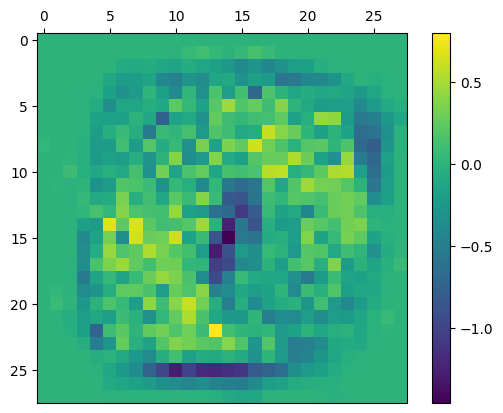

In [38]:
w = model.coef_[0].reshape(28, 28)

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.invert_yaxis()
ax.xaxis.tick_top()
im = ax.imshow(w)
fig.colorbar(im, ax=ax)
fig.show()

### 確認問題

In [39]:
class LogisticClassifier():

  def __init__(self):
    self.W = None

  def softmax(self, a):
    # refer 6.5.1
    ea = np.exp(a - np.max(a))
    return ea / np.sum(ea)

  def train(self, X, Y, num_class, eta=1e-3, alpha=1e-6, epoch=100000, eps=1e-6):
    N = X.shape[0]
    self.W = np.random.uniform(size=(X.shape[-1], num_class))
    for t in range(epoch):
      i = np.random.choice(N)
      hat_y = self.predict_proba(X[i])
      # to one-hot vector
      y = np.zeros(num_class)
      y[Y[i]] = 1.0
      delta = (y - hat_y) * X[i].reshape((-1, 1)) - 2 * alpha * self.W / N
      if np.sum(np.abs(delta)) < eps:
        break
      self.W += eta * delta
    return self

  def predict_proba(self, x):
    value = x @ self.W
    if len(value.shape) < 2:
      return self.softmax(value).flatten()
    else:
      return np.apply_along_axis(self.softmax, axis=1, arr=value)

  def predict(self, x):
    proba = self.predict_proba(x)
    return np.argmax(proba, axis=1)


In [40]:
X_train = data["train_x"]


def to_feature(X):
  return np.c_[X.reshape((X.shape[0], -1)), np.ones(X.shape[0])]


X_train = to_feature(X_train)
model = LogisticClassifier().train(X=X_train, Y=data["train_y"], num_class=10)


In [41]:
X_test = data["test_x"]
X_test = to_feature(X_test)

In [42]:
from sklearn.metrics import classification_report


predictions = model.predict(X_test)
print(classification_report(data["test_y"], predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.90      0.86      0.88      1032
           3       0.86      0.89      0.88      1010
           4       0.88      0.90      0.89       982
           5       0.88      0.78      0.83       892
           6       0.91      0.92      0.91       958
           7       0.92      0.88      0.90      1028
           8       0.82      0.86      0.84       974
           9       0.86      0.87      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

